In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Bank_Churn.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop('Surname',axis='columns', inplace=True)

In [8]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [10]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

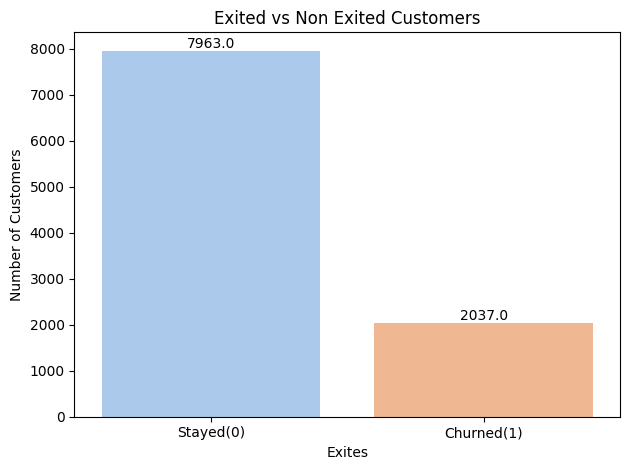

In [11]:
# Plot the churn distribution
ax = sns.countplot(x='Exited', data=df, hue='Exited', legend=False, palette='pastel')
plt.title('Exited vs Non Exited Customers')
plt.xlabel('Exites')
plt.ylabel('Number of Customers')
plt.xticks([0,1], ['Stayed(0)', 'Churned(1)'])

# Add counts labels to the bars
for p in ax.patches:
  count = p.get_height()
  ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()),
              ha='center', va='center', fontsize=10, color='black',
              xytext=(0,5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [12]:
# splitting the data
X = df.drop('Exited', axis='columns')  #
y = df['Exited']

In [13]:
# Balancing the imbalance dataset Hybrid Technique:- SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42, sampling_strategy='auto')
x_res, y_res = smt.fit_resample(X, y)


In [14]:
y_res.value_counts()

,count
Exited,
1,7246
0,7246


In [15]:
print("Minimum age in dataset:", df['Age'].min())
print("Maximum age in dataset:", df['Age'].max())

Minimum age in dataset: 18
Maximum age in dataset: 92


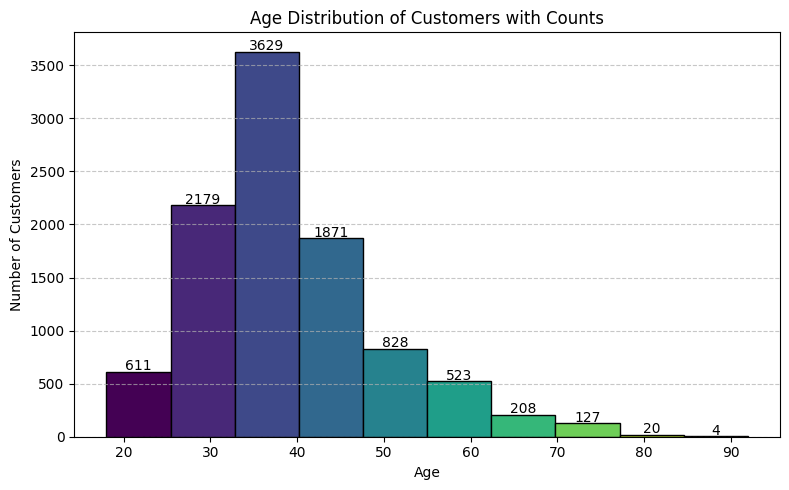

In [16]:
# Create the histogram
plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(df['Age'], bins=10, edgecolor='black')

# Apply different colors to each bin
colors = plt.cm.viridis(np.linspace(0, 1, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Add count labels on top of each bar
for i in range(len(patches)):
    height = n[i]
    bin_center = (bins[i] + bins[i+1]) / 2
    plt.text(bin_center, height + 15, f'{int(height)}', ha='center', fontsize=10)

# Decorate plot
plt.title('Age Distribution of Customers with Counts')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
df.drop('CustomerId',axis='columns', inplace=True)

<Axes: >

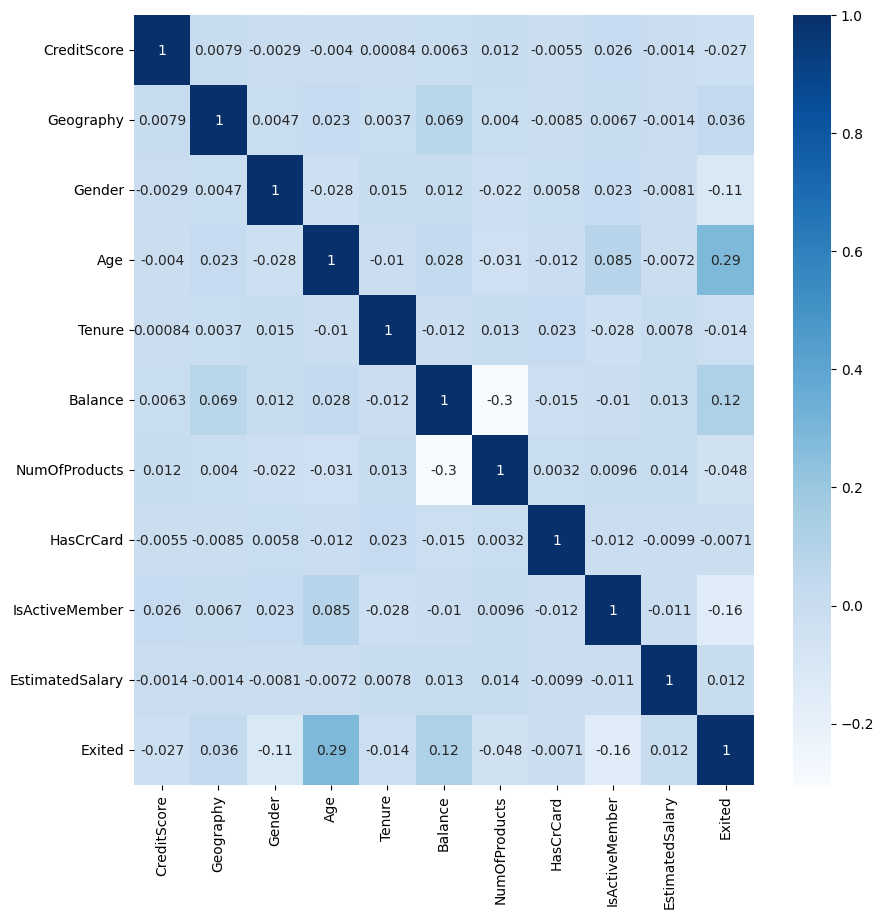

In [18]:
# Heatmap
figure = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=42)

In [20]:
# Define Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

In [21]:
models = {
    "Logistic Regression" : LogisticRegression(max_iter=1000),
    "Random Forest" : RandomForestClassifier(random_state=42),
    "XGBoost" : XGBClassifier(eval_metric='logloss', random_state=42)
}

Logistic Regression Accuracy: 0.7677

 Classification Report:- 
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2240
           1       0.75      0.79      0.77      2108

    accuracy                           0.77      4348
   macro avg       0.77      0.77      0.77      4348
weighted avg       0.77      0.77      0.77      4348


 Confusion Matrix:- 


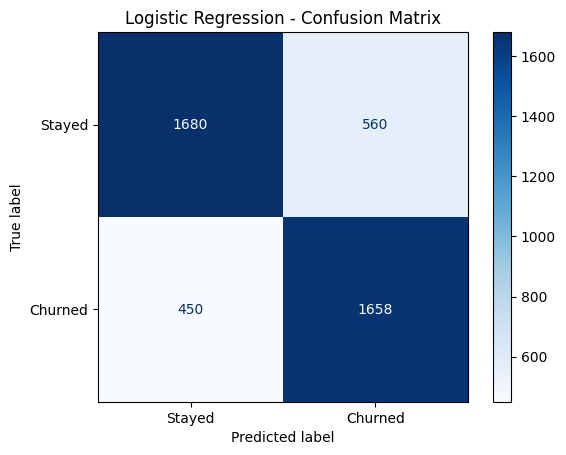

Random Forest Accuracy: 0.8604

 Classification Report:- 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2240
           1       0.85      0.87      0.86      2108

    accuracy                           0.86      4348
   macro avg       0.86      0.86      0.86      4348
weighted avg       0.86      0.86      0.86      4348


 Confusion Matrix:- 


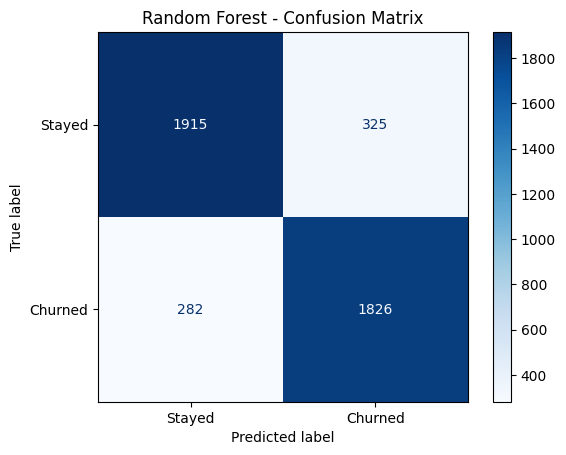

XGBoost Accuracy: 0.8606

 Classification Report:- 
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2240
           1       0.85      0.86      0.86      2108

    accuracy                           0.86      4348
   macro avg       0.86      0.86      0.86      4348
weighted avg       0.86      0.86      0.86      4348


 Confusion Matrix:- 


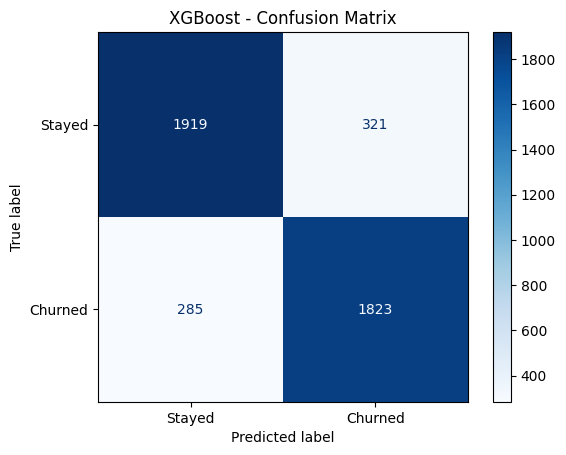

In [22]:
accuracy_scores = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

    print(f"\n Classification Report:- ")
    print(classification_report(y_test, y_pred))

    print(f"\n Confusion Matrix:- ")
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["Stayed", "Churned"])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


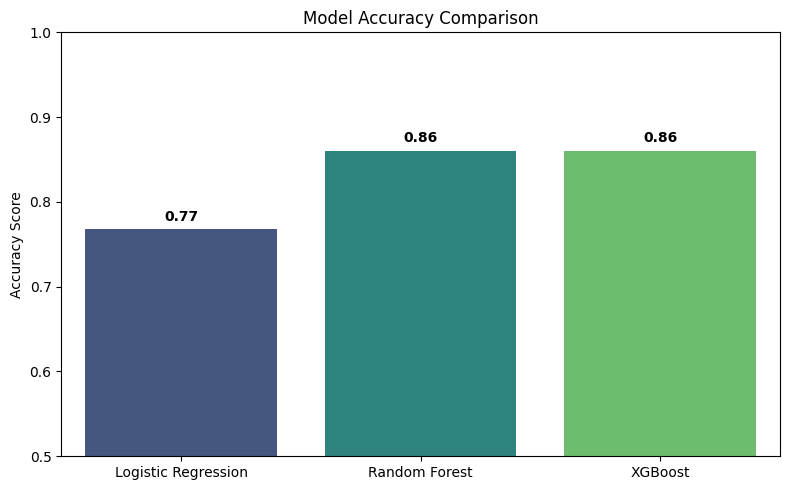

In [23]:
# Bar Plot of Accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), hue=list(accuracy_scores.keys()), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0.5, 1.0)
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

In [24]:
for name, model in models.items():
    print(f"\n🔍 Model: {name}")
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"✅ Training Accuracy: {train_acc:.4f}")
    print(f"✅ Testing Accuracy: {test_acc:.4f}")


🔍 Model: Logistic Regression
✅ Training Accuracy: 0.7702
✅ Testing Accuracy: 0.7677

🔍 Model: Random Forest
✅ Training Accuracy: 1.0000
✅ Testing Accuracy: 0.8604

🔍 Model: XGBoost
✅ Training Accuracy: 0.9659
✅ Testing Accuracy: 0.8606


In [25]:
import joblib
joblib.dump(model, "final_Bank_churn.pkl")

print("Model finalized and saved successfully!")

Model finalized and saved successfully!
